In [ ]:
!pip install FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.9/347.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━

**FIRST DATASET - SENTIMENT ANALYSIS, TURKISH**

In [ ]:
import pandas as pd
import tensorflow as tf
import torch
import numpy as np
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from transformers import AutoModel
from sentence_transformers import SentenceTransformer
from FlagEmbedding import BGEM3FlagModel

# check GPU
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")

df = pd.read_excel("/content/sentiment_analysis.xlsx")
df = df.rename(columns={'Sentiment' : 'category', 'Text' : 'text'})
df_0 = df[df['category'] == 0]
df_1 = df[df['category'] == 1]

# Randomly sample 5294 rows from the ones (to match the zeros)
df_1_balanced = df_1.sample(n=5294, random_state=42)  # random_state ensures reproducibility

# Combine the balanced data back together
df_balanced = pd.concat([df_0, df_1_balanced])

# Shuffle the combined DataFrame
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

GPU: Tesla T4


In [ ]:
#ADD SOME GRAPHICAL INFORMATION ABOUT THE DATASET

In [ ]:
df.head()

,text,category
0,okuma ve yazma hızı iyi ben begendim,1
1,Kargo Ücreti,0
2,kargomu bekleyene kadar kök saldım sonuç yine ...,0
3,Para İadesi Yapılmıyor!,0
4,Çok kullanışlı ve sağlam bir ürün. Taşıması ko...,1


In [ ]:
models = []
embeddings_dict = {}
#Initializing the embedding models and creating embeddings for data
model1 = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
embeddings1 = model1.encode(df['text'].tolist())
embeddings_dict['model1'] = embeddings1

model2 = SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True)
task = "classification"
embeddings2 = model2.encode(df['text'].tolist(), task=task, prompt_name=task)
embeddings_dict['model2'] = embeddings2

model5 = SentenceTransformer('thenlper/gte-large')
embeddings5 = model5.encode(df['text'].tolist())
embeddings_dict['model5'] = embeddings5

model4 = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)
embeddings4 = model4.encode(df['text'].tolist())
embeddings_dict['model4'] = embeddings4

model3 = SentenceTransformer('intfloat/multilingual-e5-large-instruct')
embeddings3 = model3.encode(df['text'].tolist())
embeddings_dict['model3'] = embeddings3

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/734k [00:00<?, ?B/s]

custom_st.py:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v3:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/49.9k [00:00<?, ?B/s]

mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- mlp.py
- embedding.py
- mha.py
- block.py
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_lora.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/70.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

configuration_hf_nomic_bert.py:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- configuration_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hf_nomic_bert.py:   0%|          | 0.00/95.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- modeling_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/547M [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/eb02ceb48c1fdcc477ff1925c9732c379f0f0d1f/modeling_hf_nomic_bert.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this 

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

In [ ]:
#firstly training the svm's with each embedding models
#--==--==--==--==--==--==--==--==
svm_models = {}
predictions_SMVS = {}

rf_models = {}
predictions_RF = {}

mlp_models = {}
predictions_MLP = {}

for model_name, embeddings in embeddings_dict.items():
  # if model_name != 'model4':
  #   continue
  # else:
    # Split the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        embeddings, df['category'].values, test_size=0.2, random_state=42
    )


    # Train SVM
    #=================================================
    start_time = time.time()
    svm = SVC(probability=True, random_state=42)
    svm.fit(X_train, y_train)
    end_time = time.time()

    # Save the model
    svm_models[model_name] = svm
    print(f"{model_name} - Training and Testing Time SVM: {end_time - start_time:.2f} seconds")


    # Get predictions
    preds = svm.predict(X_test)
    predictions_SMVS[model_name] = preds
    print(f"{model_name} SVM Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))
    #=================================================

    #Train RF
    #=================================================
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned
    rf.fit(X_train, y_train)
    end_time = time.time()

    # Save the model
    rf_models[model_name] = rf
    print(f"{model_name} - Training and Testing Time RF: {end_time - start_time:.2f} seconds")


    # Get predictions
    preds = rf.predict(X_test)
    predictions_RF[model_name] = preds

    print(f"{model_name} RF Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))
    #=================================================

    #Train MLP
    #=================================================
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)  # You can tune these
    mlp.fit(X_train, y_train)
    end_time = time.time()

    # Save the model
    mlp_models[model_name] = mlp
    print(f"{model_name} - Training and Testing Time MLP: {end_time - start_time:.2f} seconds")


    # Get predictions
    preds = mlp.predict(X_test)
    predictions_MLP[model_name] = preds

    print(f"{model_name} Accuracy MLP: {accuracy_score(y_test, preds):.4f}")
    print(classification_report(y_test, preds))
    #=================================================



model1 - Training and Testing Time SVM: 34.77 seconds
model1 SVM Accuracy: 0.8928
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1058
           1       0.90      0.89      0.89      1060

    accuracy                           0.89      2118
   macro avg       0.89      0.89      0.89      2118
weighted avg       0.89      0.89      0.89      2118

model1 - Training and Testing Time RF: 19.85 seconds
model1 RF Accuracy: 0.8395
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1058
           1       0.85      0.82      0.84      1060

    accuracy                           0.84      2118
   macro avg       0.84      0.84      0.84      2118
weighted avg       0.84      0.84      0.84      2118

model1 - Training and Testing Time MLP: 13.33 seconds
model1 Accuracy MLP: 0.8777
              precision    recall  f1-score   support

           0       0.88      0.88      0.88    

In [ ]:
# Collect predictions for the algorithms
all_predictions_SVMS = np.array(list(predictions_SMVS.values()))
all_predictions_RF = np.array(list(predictions_RF.values()))
all_predictions_MLP = np.array(list(predictions_MLP.values()))

# Collect predictions for the models (embedding)
all_predictions_Model1 = np.array([
    list(predictions_SMVS['model1']),
    list(predictions_RF['model1']),
    list(predictions_MLP['model1'])
])

all_predictions_Model2 = np.array([
    list(predictions_SMVS['model2']),
    list(predictions_RF['model2']),
    list(predictions_MLP['model2'])
])

all_predictions_Model3 = np.array([
    list(predictions_SMVS['model3']),
    list(predictions_RF['model3']),
    list(predictions_MLP['model3'])
])

all_predictions_Model4 = np.array([
    list(predictions_SMVS['model4']),
    list(predictions_RF['model4']),
    list(predictions_MLP['model4'])
])

all_predictions_Model5 = np.array([
    list(predictions_SMVS['model5']),
    list(predictions_RF['model5']),
    list(predictions_MLP['model5'])
])

In [ ]:
#Total Ensemble
all_predictions = np.array([
    list(predictions_SMVS['model1']),
    list(predictions_RF['model1']),
    list(predictions_MLP['model1']),
    list(predictions_SMVS['model2']),
    list(predictions_RF['model2']),
    list(predictions_MLP['model2']),
    list(predictions_SMVS['model3']),
    list(predictions_RF['model3']),
    list(predictions_MLP['model3']),
    list(predictions_SMVS['model4']),
    list(predictions_RF['model4']),
    list(predictions_MLP['model4']),
    list(predictions_SMVS['model5']),
    list(predictions_RF['model5']),
    list(predictions_MLP['model5'])
])

In [ ]:
# Majority Voting Ensemble
ensemble_preds_SMVS = mode(all_predictions_SVMS, axis=0).mode.flatten()
ensemble_preds_RF = mode(all_predictions_RF, axis=0).mode.flatten()
ensemble_preds_MLP = mode(all_predictions_MLP, axis=0).mode.flatten()

ensemble_preds_M1 = mode(all_predictions_Model1, axis=0).mode.flatten()
ensemble_preds_M2 = mode(all_predictions_Model2, axis=0).mode.flatten()
ensemble_preds_M3 = mode(all_predictions_Model3, axis=0).mode.flatten()
ensemble_preds_M4 = mode(all_predictions_Model4, axis=0).mode.flatten()
ensemble_preds_M5 = mode(all_predictions_Model5, axis=0).mode.flatten()


In [ ]:
#majority voting for total ensembling
total_ensemble_preds = mode(all_predictions, axis=0).mode.flatten()

In [ ]:
ensemble_preds_SMVS.shape

(2118,)

In [ ]:
y_test.shape

(2118,)

In [ ]:
# Evaluate Ensemble
ensemble_accuracy_SVMS = accuracy_score(y_test.flatten(), ensemble_preds_SMVS)
ensemble_accuracy_RF = accuracy_score(y_test.flatten(), ensemble_preds_RF)
ensemble_accuracy_MLP = accuracy_score(y_test.flatten(), ensemble_preds_MLP)

ensemble_accuracy_M1 = accuracy_score(y_test.flatten(), ensemble_preds_M1)
ensemble_accuracy_M2 = accuracy_score(y_test.flatten(), ensemble_preds_M2)
ensemble_accuracy_M3 = accuracy_score(y_test.flatten(), ensemble_preds_M3)
ensemble_accuracy_M4 = accuracy_score(y_test.flatten(), ensemble_preds_M4)
ensemble_accuracy_M5 = accuracy_score(y_test.flatten(), ensemble_preds_M5)


print(f"Ensemble Accuracy SVM: {ensemble_accuracy_SVMS:.4f}")
print(f"Ensemble Accuracy RF: {ensemble_accuracy_RF:.4f}")
print(f"Ensemble Accuracy MLP: {ensemble_accuracy_MLP:.4f}")

print(f"Ensemble Accuracy M1: {ensemble_accuracy_M1:.4f}")
print(f"Ensemble Accuracy M2: {ensemble_accuracy_M2:.4f}")
print(f"Ensemble Accuracy M3: {ensemble_accuracy_M3:.4f}")
print(f"Ensemble Accuracy M4: {ensemble_accuracy_M4:.4f}")
print(f"Ensemble Accuracy M5: {ensemble_accuracy_M5:.4f}")

Ensemble Accuracy SVM: 0.9367
Ensemble Accuracy RF: 0.9202
Ensemble Accuracy MLP: 0.9433
Ensemble Accuracy M1: 0.8881
Ensemble Accuracy M2: 0.9622
Ensemble Accuracy M3: 0.9618
Ensemble Accuracy M4: 0.8966
Ensemble Accuracy M5: 0.8829


In [ ]:
#evaluate ensembling for total
ensemble_accuracy_total = accuracy_score(y_test.flatten(), total_ensemble_preds)
print(f"Ensemble Accuracy SVM: {ensemble_accuracy_total:.4f}")

Ensemble Accuracy SVM: 0.9438


In [ ]:
print("M1:", model1)
print("M2:", model2)
print("M3:", model3)
print("M4:", model4)
print("M5:", model5)

M1: SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)
M2: SentenceTransformer(
  (transformer): Transformer(
    (auto_model): XLMRobertaLoRA(
      (roberta): XLMRobertaModel(
        (embeddings): XLMRobertaEmbeddings(
          (word_embeddings): ParametrizedEmbedding(
            250002, 1024, padding_idx=1
            (parametrizations): ModuleDict(
              (weight): ParametrizationList(
                (0): LoRAParametrization()
              )
            )
          )
          (token_type_embeddings): ParametrizedEmbedding(
            1, 1024
            (parametrizations): ModuleDict(
 

In [ ]:
print("Shape of embeddings M1:", embeddings1.shape)
print("Shape of embeddings M2:", embeddings2.shape)
print("Shape of embeddings M3:", embeddings3.shape)
print("Shape of embeddings M4:", embeddings4.shape)
print("Shape of embeddings M5:", embeddings5.shape)

Shape of embeddings M1: (10588, 384)
Shape of embeddings M2: (10588, 1024)
Shape of embeddings M3: (10588, 1024)
Shape of embeddings M4: (10588, 768)
Shape of embeddings M5: (10588, 1024)


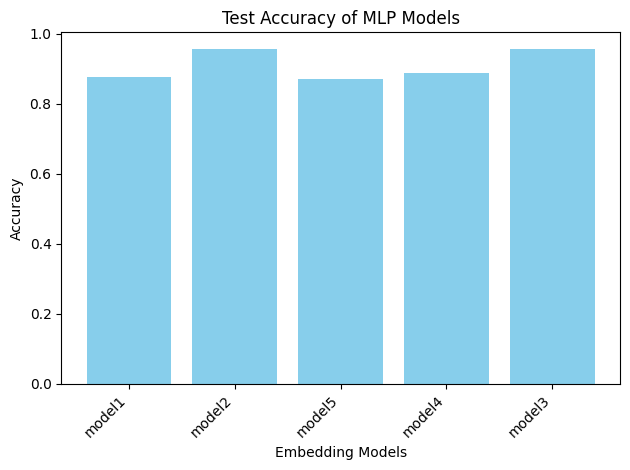

In [ ]:
import matplotlib.pyplot as plt

model_names = list(predictions_MLP.keys())
accuracies = [accuracy_score(y_test, preds) for preds in predictions_MLP.values()]

plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Embedding Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of MLP Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

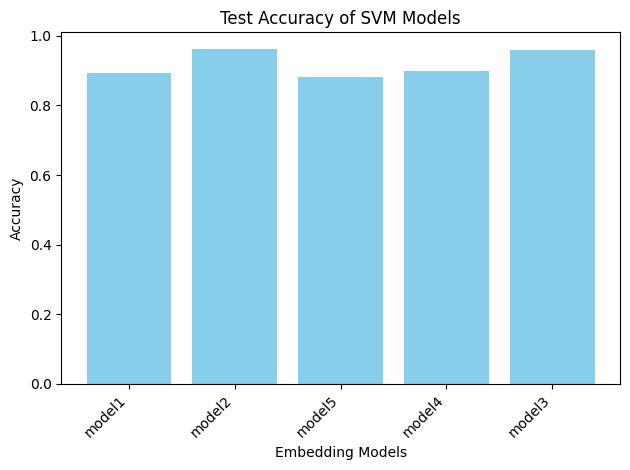

In [ ]:
import matplotlib.pyplot as plt

model_names = list(predictions_SMVS.keys())
accuracies = [accuracy_score(y_test, preds) for preds in predictions_SMVS.values()]

plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Embedding Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of SVM Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

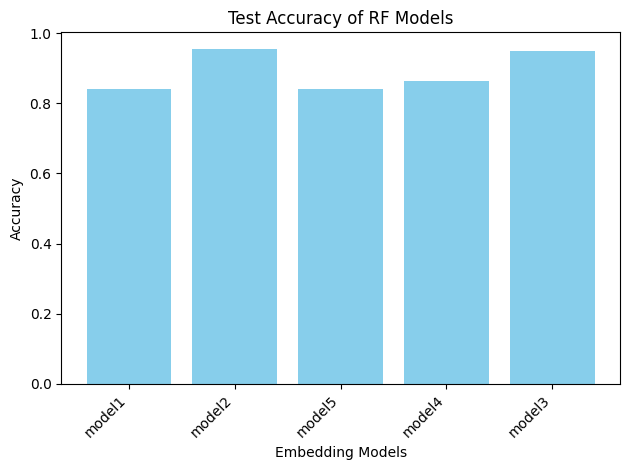

In [ ]:
import matplotlib.pyplot as plt

model_names = list(predictions_RF.keys())
accuracies = [accuracy_score(y_test, preds) for preds in predictions_RF.values()]

plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Embedding Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of RF Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()